### Linear Regression and Boston Data Set

- Load Boston Data Set from `sklearn.datasets`, use 

```
from sklearn.datasets import load_boston
boston = load_boston()
```
- Assign `data` to `X` and `target` to `y`


In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
X, y = boston.data, boston.target

- Check the shape of the dataset

In [6]:
X.shape

(506, 13)

- Plot the scatter plot of each attribute versus `MEDV`
- You can use the starter code below

```
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
  ```

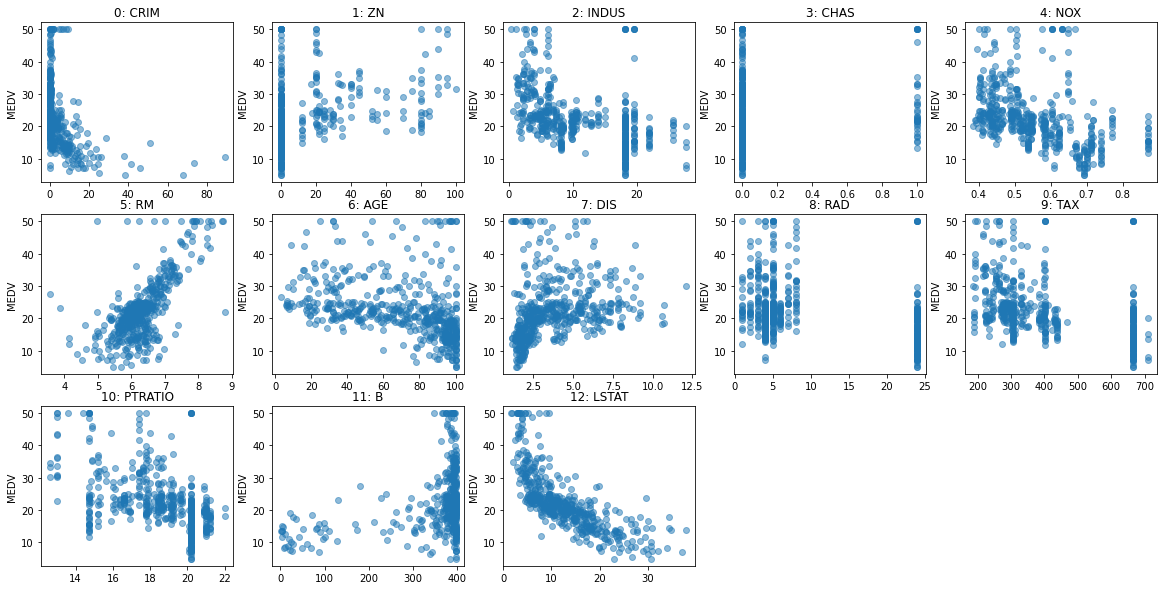

In [139]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [140]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [141]:
X.shape

(506, 13)

- Split the dataset into test and train datasets, you can set the random seed to 42 by `random_state=42`

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- run cross validation for the train and test datasets for `cv=10`
- print the mean score for the cross validation using linear regressor (`LinearRegressor()`)
- do the same two steps above for random forest regressor. For that you can import
```
from sklearn.ensemble import RandomForestRegressor
```

In [143]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7160133196648378

In [144]:
from sklearn.ensemble import RandomForestRegressor
np.mean(cross_val_score(RandomForestRegressor(), X_train, y_train, cv=10))

0.8439065903973452

## Boston Housing Data with Polynomials

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model

In [159]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target
#X, y = data.data, data.target

X_poly = PolynomialFeatures(include_bias=False).fit_transform(SimpleImputer().fit_transform(scale(X)))
print(X_poly.shape)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [18]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, scale
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

trans=Pipeline([
            ("poly", PolynomialFeatures(include_bias=False)),
            ("imputer", SimpleImputer()),
            ("scale", StandardScaler())
        ])
boston = load_boston()
X, y = boston.data, boston.target
#X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_poly_train = trans.fit_transform(X_train)
X_poly_test = trans.transform(X_test)
print(X_poly_train.shape)


(379, 104)


In [19]:
np.mean(cross_val_score(LinearRegression(), X_poly_train, y_train, cv=10))

0.8065194743873981

In [20]:
lr = LinearRegression().fit(X_poly_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
plt.savefig("Fig/lr_coefficients_large.png")

NameError: name 'X_poly' is not defined